<a href="https://colab.research.google.com/github/Yashmalhotra01/Predicting-the-peak-hours-of-usage-of-Lift-and-Escalator-by-overload-prediction-detection/blob/main/Predicting_the_peak_hours_of_usage_of_Lift_and_Escalator_by_overload_prediction_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Overload'] = chunk['carLoad'].apply(lambda x: 1 if x == 1 or x == 2 else 0)
<ipython-input-1-a0d1cd9b4db2>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['dateTime'] = pd.to_datetime(chunk['dateTime'], format='%Y-%m-%dT%H:%M:%S.%fZ')
<ipython-input-1-a0d1cd9b4db2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

     Hour Overload Count  Overload Percentage Total Count  overload_count  \
Hour                                                                        
0     NaN            NaN             2.525253         NaN            10.0   
1     NaN            NaN             0.000000         NaN             0.0   
2     NaN            NaN             0.000000         NaN             0.0   
3     NaN            NaN             0.000000         NaN             0.0   
4     NaN            NaN             0.000000         NaN             0.0   
5     NaN            NaN             0.000000         NaN             0.0   
6     NaN            NaN             1.718964         NaN             7.0   
7     NaN            NaN             4.359181         NaN            19.0   
8     NaN            NaN             3.538799         NaN            18.0   
9     NaN            NaN             1.319126         NaN             8.0   
10    NaN            NaN             3.261854         NaN            12.0   

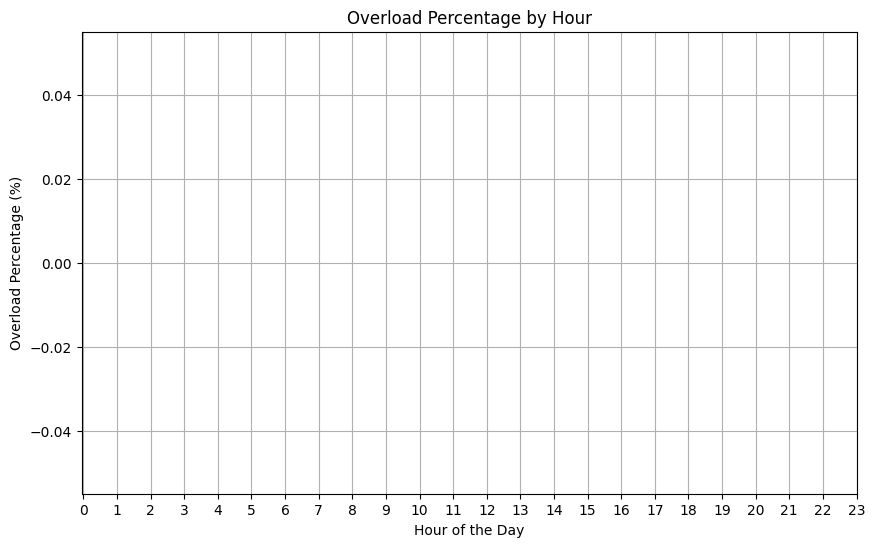

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load data in chunks and preprocess
def load_data_in_chunks(file_path, chunk_size=100000):
    # Initialize an empty DataFrame to accumulate results
    hourly_data = pd.DataFrame(columns=['Hour', 'Total Count', 'Overload Count'])

    # Read the CSV file in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        # Preprocess the chunk (remove undefined values, calculate overloads)
        chunk_processed = preprocess_data(chunk)

        # Aggregate the data by hour
        chunk_hourly_data = aggregate_chunk(chunk_processed)

        # Accumulate results by hour
        hourly_data = hourly_data.add(chunk_hourly_data, fill_value=0)

    return hourly_data

# Preprocess the data: Remove undefined carload values and classify overloads
def preprocess_data(chunk):
    # Remove rows where carload is undefined (255)
    chunk = chunk[chunk['carLoad'] != 255]

    # Convert carload to overload binary: 1 for overload, 0 for normal
    chunk['Overload'] = chunk['carLoad'].apply(lambda x: 1 if x == 1 or x == 2 else 0)
    chunk['dateTime'] = pd.to_datetime(chunk['dateTime'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    # Convert timestamp to datetime format
   # chunk['dateTime'] = pd.to_datetime(chunk['dateTime'])

    # Extract hour from the timestamp for hourly analysis
    chunk['Hour'] = chunk['dateTime'].dt.hour

    return chunk

# Aggregate the data by hour and calculate overload percentages
def aggregate_chunk(chunk):
    # Group by hour and calculate total and overload counts
    chunk_hourly_data = chunk.groupby('Hour')['Overload'].agg(
        total_count='count',  # Total observations
        overload_count='sum'  # Total overloads (1 or 2)
    )

    # Calculate overload percentage for each hour
    chunk_hourly_data['Overload Percentage'] = (chunk_hourly_data['overload_count'] / chunk_hourly_data['total_count']) * 100

    return chunk_hourly_data

# Visualize overload percentage by hour using a line plot
def visualize_peak_hours(hourly_data):
    # Sort data by hour to make the visualization easier to read
    hourly_data = hourly_data.sort_index()

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=hourly_data, x='Hour', y='Overload Percentage', marker='o')
    plt.title('Overload Percentage by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Overload Percentage (%)')
    plt.grid(True)
    plt.xticks(np.arange(0, 24, 1))  # Display hourly ticks
    plt.show()

# Main function to execute the process
def main(file_path):
    # Load and process data in chunks
    hourly_data = load_data_in_chunks(file_path, chunk_size=10000)

    # Print the aggregated hourly overload data for reference
    print(hourly_data)

    # Visualize the overload percentage by hour
    visualize_peak_hours(hourly_data)

# Run the script with the path to the data file
if __name__ == '__main__':
    # Example file path; replace it with the actual path of your data file
    file_path = '/content/drive/MyDrive/LIFT_ESCALATOR.8_168_LIFT.csv'  # Provide the full path to your data file
    main(file_path)
